# Training GAN with BCE Loss on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 1e-5
NUM_EPOCHES = 200

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from models.GAN import GAN_Generator, GAN_Discriminator

In [8]:
latent_dim = 64
g_out_size = 784
g_hidden_size = 128
g_num_layers = 4

d_hidden_size = 512
d_num_layers = 3

g = GAN_Generator(latent_dim, g_out_size, g_hidden_size, g_num_layers).to(device)
d = GAN_Discriminator(g_out_size, d_hidden_size, d_num_layers).to(device)
print(g)
print(d)

GAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)
GAN_Discriminator

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 784])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
criterion = nn.BCEWithLogitsLoss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR)
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR)

Epoch 1: Generator Loss: 0.0035892346266236134; Discriminator Loss: 0.0007139613379293413
Epoch 2: Generator Loss: 0.0038588448628179553; Discriminator Loss: 0.0005070635123547714
Epoch 3: Generator Loss: 0.0042314488750530965; Discriminator Loss: 0.00032322302555987066
Epoch 4: Generator Loss: 0.0038457087108067106; Discriminator Loss: 0.00037776829718526745
Epoch 5: Generator Loss: 0.0036764460077672117; Discriminator Loss: 0.00037038875922465377


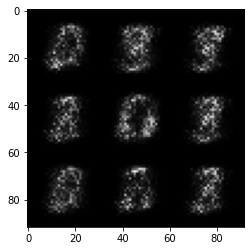

Epoch 6: Generator Loss: 0.004635168291104119; Discriminator Loss: 0.0002826553926284888
Epoch 7: Generator Loss: 0.004975857765181487; Discriminator Loss: 0.00027911075905187805
Epoch 8: Generator Loss: 0.005574191811242337; Discriminator Loss: 0.00027490761488485437
Epoch 9: Generator Loss: 0.006714214394087477; Discriminator Loss: 0.00021152266624893968
Epoch 10: Generator Loss: 0.007100485535318664; Discriminator Loss: 0.00017615075685830514


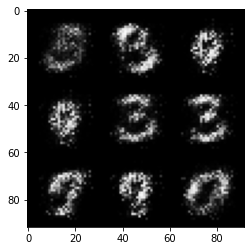

Epoch 11: Generator Loss: 0.007155797628959867; Discriminator Loss: 0.00018905384390593082
Epoch 12: Generator Loss: 0.00686824448835621; Discriminator Loss: 0.0002202477727109181
Epoch 13: Generator Loss: 0.007945402344660972; Discriminator Loss: 0.00015787891487577068
Epoch 14: Generator Loss: 0.007964652738591501; Discriminator Loss: 0.0002006190354381797
Epoch 15: Generator Loss: 0.008284455931771285; Discriminator Loss: 8.5640746329639e-05


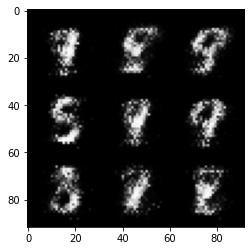

Epoch 16: Generator Loss: 0.008767893573622714; Discriminator Loss: 0.00010763795009808246
Epoch 17: Generator Loss: 0.00850798885451197; Discriminator Loss: 0.0001082877392199502
Epoch 18: Generator Loss: 0.00864796648655873; Discriminator Loss: 0.0001145804694085233
Epoch 19: Generator Loss: 0.00905558193670407; Discriminator Loss: 0.00015922329191968385
Epoch 20: Generator Loss: 0.008184781715051452; Discriminator Loss: 0.00012497260753533988


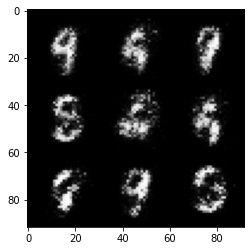

Epoch 21: Generator Loss: 0.009460953507087887; Discriminator Loss: 8.431782346290312e-05
Epoch 22: Generator Loss: 0.008693685917966147; Discriminator Loss: 0.00012597136660171215
Epoch 23: Generator Loss: 0.00884863766017499; Discriminator Loss: 0.00019302406608422937
Epoch 24: Generator Loss: 0.007840693378245145; Discriminator Loss: 0.00015866829515266012
Epoch 25: Generator Loss: 0.009713077341823945; Discriminator Loss: 0.00012782066742748595


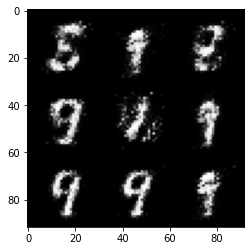

Epoch 26: Generator Loss: 0.00905484177156298; Discriminator Loss: 0.00020545601908331996
Epoch 27: Generator Loss: 0.008348208754809934; Discriminator Loss: 8.55150157963035e-05
Epoch 28: Generator Loss: 0.008514009813255848; Discriminator Loss: 0.00016299983077466108
Epoch 29: Generator Loss: 0.009603272623090601; Discriminator Loss: 0.0001297404389899931
Epoch 30: Generator Loss: 0.008536017525679012; Discriminator Loss: 0.00013017164332780249


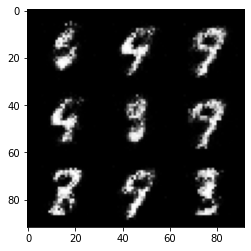

Epoch 31: Generator Loss: 0.008202640232501; Discriminator Loss: 0.0001729151079141255
Epoch 32: Generator Loss: 0.009107327410407158; Discriminator Loss: 0.0002113801202794382
Epoch 33: Generator Loss: 0.006833016491139621; Discriminator Loss: 0.0001754790925776272
Epoch 34: Generator Loss: 0.00831233412980525; Discriminator Loss: 0.00020738797528403147
Epoch 35: Generator Loss: 0.0076182818870300425; Discriminator Loss: 0.00014792741742977963


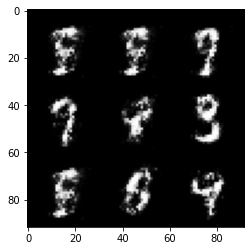

Epoch 36: Generator Loss: 0.009590673548326309; Discriminator Loss: 0.00018755891429844188
Epoch 37: Generator Loss: 0.008114945913937046; Discriminator Loss: 0.00020841154843759436
Epoch 38: Generator Loss: 0.008341585903533741; Discriminator Loss: 0.00016798814540224544
Epoch 39: Generator Loss: 0.006196792700143257; Discriminator Loss: 0.00025484469463067774
Epoch 40: Generator Loss: 0.0075299943179718215; Discriminator Loss: 0.0003197912150608705


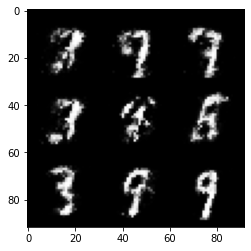

Epoch 41: Generator Loss: 0.007106543095635453; Discriminator Loss: 0.0001643562494818844
Epoch 42: Generator Loss: 0.008005871701596388; Discriminator Loss: 0.00019854014870454508
Epoch 43: Generator Loss: 0.007288514932335567; Discriminator Loss: 0.0001861883410766943
Epoch 44: Generator Loss: 0.007119579355853961; Discriminator Loss: 0.00022900306276166872
Epoch 45: Generator Loss: 0.006675414693380978; Discriminator Loss: 0.00018086022278393255


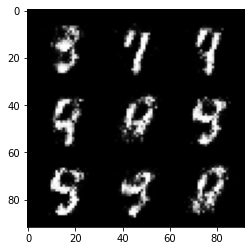

Epoch 46: Generator Loss: 0.006840827876825068; Discriminator Loss: 0.000247740367455269
Epoch 47: Generator Loss: 0.007063287661782206; Discriminator Loss: 0.0004107359884136013
Epoch 48: Generator Loss: 0.007564302192313839; Discriminator Loss: 0.00035645896946189247
Epoch 49: Generator Loss: 0.008145531611656076; Discriminator Loss: 0.0002658593057315233
Epoch 50: Generator Loss: 0.0066711424764539645; Discriminator Loss: 0.00027927355979805564


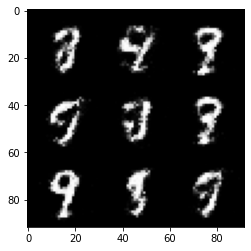

Epoch 51: Generator Loss: 0.006187060748590335; Discriminator Loss: 0.00026912030889027157
Epoch 52: Generator Loss: 0.006537408462719623; Discriminator Loss: 0.00023396818368419655
Epoch 53: Generator Loss: 0.007560869269787884; Discriminator Loss: 0.00025536750616041073
Epoch 54: Generator Loss: 0.00804438418162657; Discriminator Loss: 0.0003479091343340843
Epoch 55: Generator Loss: 0.0066601401453079195; Discriminator Loss: 0.00023590876603685716


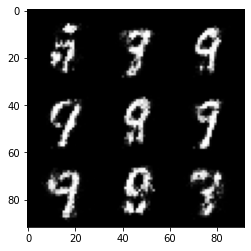

Epoch 56: Generator Loss: 0.0063052309601545845; Discriminator Loss: 0.0002452070588496194
Epoch 57: Generator Loss: 0.007156928719233856; Discriminator Loss: 0.0002728332715756349
Epoch 58: Generator Loss: 0.005416100467446008; Discriminator Loss: 0.0005679992851672142
Epoch 59: Generator Loss: 0.006156490301526686; Discriminator Loss: 0.00037076850054360656
Epoch 60: Generator Loss: 0.006330000057911822; Discriminator Loss: 0.0004872414094806988


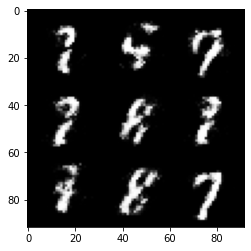

Epoch 61: Generator Loss: 0.005880790986994436; Discriminator Loss: 0.00042518862147829424
Epoch 62: Generator Loss: 0.005664367919791736; Discriminator Loss: 0.0002315657924233215
Epoch 63: Generator Loss: 0.006550223080079947; Discriminator Loss: 0.0003389033046104252
Epoch 64: Generator Loss: 0.00592884071854386; Discriminator Loss: 0.00044615458705023664
Epoch 65: Generator Loss: 0.005616143314060626; Discriminator Loss: 0.0004423733459098507


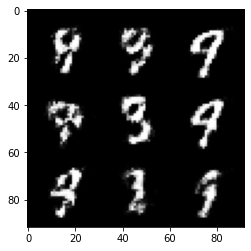

Epoch 66: Generator Loss: 0.006034445915140831; Discriminator Loss: 0.0003939097179278636
Epoch 67: Generator Loss: 0.005766281949431657; Discriminator Loss: 0.00033707916736602783
Epoch 68: Generator Loss: 0.005666599599028955; Discriminator Loss: 0.00039880352615039234
Epoch 69: Generator Loss: 0.006293611994176023; Discriminator Loss: 0.0006378318455173517
Epoch 70: Generator Loss: 0.006243648305376455; Discriminator Loss: 0.00044872203488339747


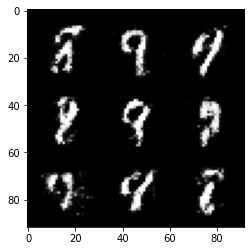

Epoch 71: Generator Loss: 0.005220479802536303; Discriminator Loss: 0.00043740932112817823
Epoch 72: Generator Loss: 0.0053865263965338275; Discriminator Loss: 0.0004484247424200908
Epoch 73: Generator Loss: 0.005295746870386575; Discriminator Loss: 0.0004454551220956896
Epoch 74: Generator Loss: 0.006230521049580848; Discriminator Loss: 0.00028736079171268165
Epoch 75: Generator Loss: 0.005170364115538119; Discriminator Loss: 0.0004711403394304613


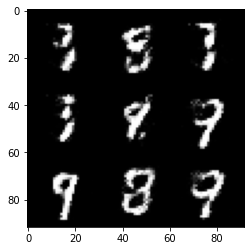

Epoch 76: Generator Loss: 0.006474519335130638; Discriminator Loss: 0.0005437276764973394
Epoch 77: Generator Loss: 0.005198921476091657; Discriminator Loss: 0.0006946083833413846
Epoch 78: Generator Loss: 0.005697440999403183; Discriminator Loss: 0.0006075533214154274
Epoch 79: Generator Loss: 0.004602160789310805; Discriminator Loss: 0.0004222741894630481
Epoch 80: Generator Loss: 0.005174809681581282; Discriminator Loss: 0.0004885974469215377


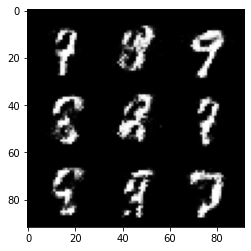

Epoch 81: Generator Loss: 0.005154521226374579; Discriminator Loss: 0.0007304228953461148
Epoch 82: Generator Loss: 0.004946149488501966; Discriminator Loss: 0.0004891810386673983
Epoch 83: Generator Loss: 0.005236958644029174; Discriminator Loss: 0.0004510355910766862
Epoch 84: Generator Loss: 0.004955339533433731; Discriminator Loss: 0.0004206180318332176
Epoch 85: Generator Loss: 0.004993930808516708; Discriminator Loss: 0.0005049367131454858


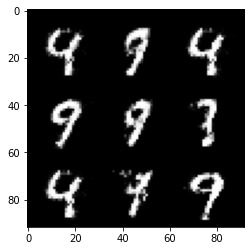

Epoch 86: Generator Loss: 0.0056253313255716746; Discriminator Loss: 0.0007561319418299173
Epoch 87: Generator Loss: 0.00552904987131863; Discriminator Loss: 0.00046545120952988484
Epoch 88: Generator Loss: 0.005051698257674033; Discriminator Loss: 0.0005792196371407905
Epoch 89: Generator Loss: 0.004798961346591714; Discriminator Loss: 0.0004581142463155393
Epoch 90: Generator Loss: 0.0044634291358085585; Discriminator Loss: 0.0007668396811495458


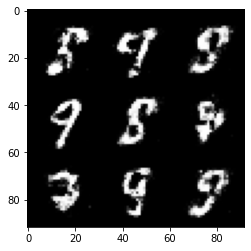

Epoch 91: Generator Loss: 0.004869914512390267; Discriminator Loss: 0.0006239024687931736
Epoch 92: Generator Loss: 0.004787346955809766; Discriminator Loss: 0.0005493436032520937
Epoch 93: Generator Loss: 0.004603917156455359; Discriminator Loss: 0.00044868540153828764
Epoch 94: Generator Loss: 0.004630329766507342; Discriminator Loss: 0.0005296597729867963
Epoch 95: Generator Loss: 0.004411725855585354; Discriminator Loss: 0.0005695545978383469


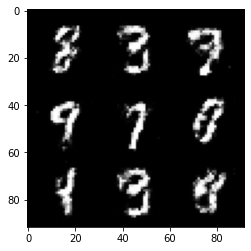

Epoch 96: Generator Loss: 0.0050296630940711825; Discriminator Loss: 0.00048077204969646073
Epoch 97: Generator Loss: 0.004296870119790279; Discriminator Loss: 0.0008365805469342132
Epoch 98: Generator Loss: 0.0043807283901710755; Discriminator Loss: 0.0006439684550645255
Epoch 99: Generator Loss: 0.005207144629472354; Discriminator Loss: 0.0005376399325917779
Epoch 100: Generator Loss: 0.004129141378504381; Discriminator Loss: 0.0008339534944562769


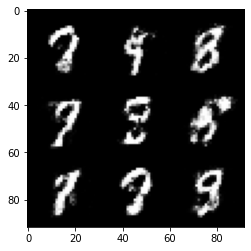

Epoch 101: Generator Loss: 0.005363484689675923; Discriminator Loss: 0.0004826054008784833
Epoch 102: Generator Loss: 0.004657887700778335; Discriminator Loss: 0.0006398614535707909
Epoch 103: Generator Loss: 0.004849131935949265; Discriminator Loss: 0.0004463120182948326
Epoch 104: Generator Loss: 0.004838474777969978; Discriminator Loss: 0.0004544907541417364
Epoch 105: Generator Loss: 0.00469761870817335; Discriminator Loss: 0.000502883816070394


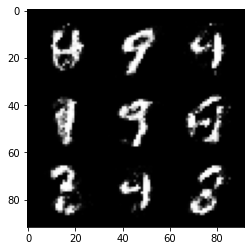

Epoch 106: Generator Loss: 0.004456324363822367; Discriminator Loss: 0.000525341867638041
Epoch 107: Generator Loss: 0.004166421859757478; Discriminator Loss: 0.0008446030271078732
Epoch 108: Generator Loss: 0.004950103983441904; Discriminator Loss: 0.000734359915576764
Epoch 109: Generator Loss: 0.004786579847844171; Discriminator Loss: 0.0007777280136466281
Epoch 110: Generator Loss: 0.004214923010706139; Discriminator Loss: 0.0005290510812039569


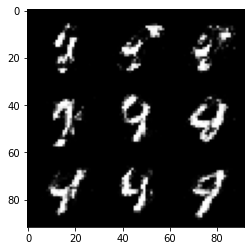

Epoch 111: Generator Loss: 0.004075815428548784; Discriminator Loss: 0.0006375689623452453
Epoch 112: Generator Loss: 0.004800272394599183; Discriminator Loss: 0.00044271762945504584
Epoch 113: Generator Loss: 0.004861139793640007; Discriminator Loss: 0.0005438140333334266
Epoch 114: Generator Loss: 0.004907418924099855; Discriminator Loss: 0.0004991678032539547
Epoch 115: Generator Loss: 0.004887117251658491; Discriminator Loss: 0.0004726373183447669


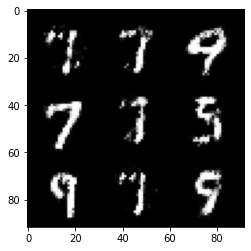

Epoch 116: Generator Loss: 0.004788253353094496; Discriminator Loss: 0.0007523383413042341
Epoch 117: Generator Loss: 0.004185250318889171; Discriminator Loss: 0.0007350775860011704
Epoch 118: Generator Loss: 0.004475131472036528; Discriminator Loss: 0.0006200936811565082
Epoch 119: Generator Loss: 0.004394290289645002; Discriminator Loss: 0.0008321126132631607
Epoch 120: Generator Loss: 0.0051579500820591; Discriminator Loss: 0.0006233680604109124


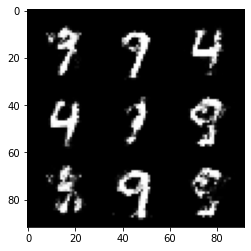

Epoch 121: Generator Loss: 0.004711258894344891; Discriminator Loss: 0.0006183217456345873
Epoch 122: Generator Loss: 0.0046262878344765605; Discriminator Loss: 0.00047393489493998385
Epoch 123: Generator Loss: 0.0050424334845309065; Discriminator Loss: 0.0005942591980322083
Epoch 124: Generator Loss: 0.00494049352877684; Discriminator Loss: 0.0006927898697761584
Epoch 125: Generator Loss: 0.004260719457923222; Discriminator Loss: 0.0006034519118286654


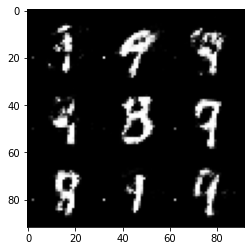

Epoch 126: Generator Loss: 0.00441401243718194; Discriminator Loss: 0.0008387582134336297
Epoch 127: Generator Loss: 0.004339106301508987; Discriminator Loss: 0.0006567253741119971
Epoch 128: Generator Loss: 0.004328184290481275; Discriminator Loss: 0.0007733543163169421
Epoch 129: Generator Loss: 0.004036032823103069; Discriminator Loss: 0.0006940234571631783
Epoch 130: Generator Loss: 0.004368305714654007; Discriminator Loss: 0.0006872977275075689


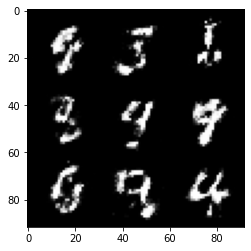

Epoch 131: Generator Loss: 0.003694684520713302; Discriminator Loss: 0.0008779227860700855
Epoch 132: Generator Loss: 0.003932422158052164; Discriminator Loss: 0.0004930605194461879
Epoch 133: Generator Loss: 0.003959452419647022; Discriminator Loss: 0.0005918682129906693
Epoch 134: Generator Loss: 0.004320821782419168; Discriminator Loss: 0.0008404294310856475
Epoch 135: Generator Loss: 0.004093979467461104; Discriminator Loss: 0.0005610038095445776


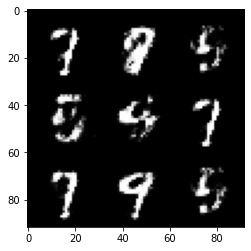

Epoch 136: Generator Loss: 0.003982772450965605; Discriminator Loss: 0.0007090816365630388
Epoch 137: Generator Loss: 0.004259857795894273; Discriminator Loss: 0.0006624143769237787
Epoch 138: Generator Loss: 0.004018936838422503; Discriminator Loss: 0.0006882489871368734
Epoch 139: Generator Loss: 0.004029562732558261; Discriminator Loss: 0.0007146940048315377
Epoch 140: Generator Loss: 0.0037596261323387943; Discriminator Loss: 0.0008633266379838305


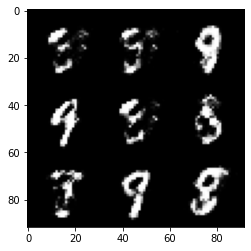

Epoch 141: Generator Loss: 0.004386051377253746; Discriminator Loss: 0.0006514375906254945
Epoch 142: Generator Loss: 0.00413984886364642; Discriminator Loss: 0.000711664906951156
Epoch 143: Generator Loss: 0.003921490488276044; Discriminator Loss: 0.0007561127514218979
Epoch 144: Generator Loss: 0.004530991064205861; Discriminator Loss: 0.0007766724776611653
Epoch 145: Generator Loss: 0.0037554601616442583; Discriminator Loss: 0.000687918302092725


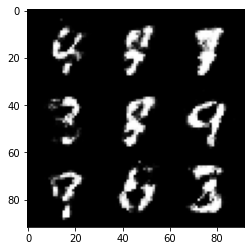

Epoch 146: Generator Loss: 0.003616875931144015; Discriminator Loss: 0.0007905395173314792
Epoch 147: Generator Loss: 0.0038063287226630174; Discriminator Loss: 0.001039979617987106
Epoch 148: Generator Loss: 0.003670739720879333; Discriminator Loss: 0.0008966602496246793
Epoch 149: Generator Loss: 0.004274698208644192; Discriminator Loss: 0.0006765068721161214
Epoch 150: Generator Loss: 0.003748871878520258; Discriminator Loss: 0.0008221534269450824


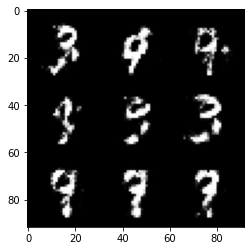

Epoch 151: Generator Loss: 0.004003872495216093; Discriminator Loss: 0.0006883716278238846
Epoch 152: Generator Loss: 0.00437067007459303; Discriminator Loss: 0.0007817520261573385
Epoch 153: Generator Loss: 0.0035105979264672123; Discriminator Loss: 0.0008231970801282285
Epoch 154: Generator Loss: 0.003447037515863935; Discriminator Loss: 0.000799676629780198
Epoch 155: Generator Loss: 0.004025208670447376; Discriminator Loss: 0.000653553110704239


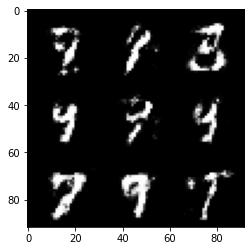

Epoch 156: Generator Loss: 0.0039347870263463655; Discriminator Loss: 0.0009135531464111068
Epoch 157: Generator Loss: 0.003445556677226573; Discriminator Loss: 0.0008332993684292856
Epoch 158: Generator Loss: 0.0034165196835613454; Discriminator Loss: 0.0007705130556753195
Epoch 159: Generator Loss: 0.0037745209390929006; Discriminator Loss: 0.0007405812298056922
Epoch 160: Generator Loss: 0.0032552279897336005; Discriminator Loss: 0.0008555153793871784


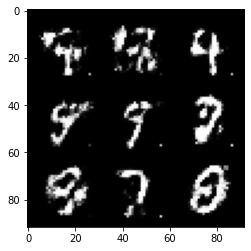

Epoch 161: Generator Loss: 0.004368029677791636; Discriminator Loss: 0.0007727881357359734
Epoch 162: Generator Loss: 0.0036656266844857224; Discriminator Loss: 0.000799819604674382
Epoch 163: Generator Loss: 0.0034908887419873463; Discriminator Loss: 0.0009335574310725686
Epoch 164: Generator Loss: 0.003350542298257986; Discriminator Loss: 0.0008182117044290246
Epoch 165: Generator Loss: 0.003505413974526086; Discriminator Loss: 0.0007733194304427613


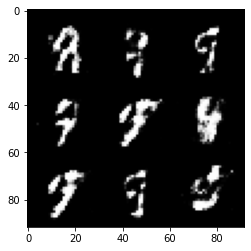

Epoch 166: Generator Loss: 0.003742250298132012; Discriminator Loss: 0.0007720158171297899
Epoch 167: Generator Loss: 0.0036516220076506073; Discriminator Loss: 0.0009445487690378608
Epoch 168: Generator Loss: 0.003730967100749392; Discriminator Loss: 0.0008206172411375717
Epoch 169: Generator Loss: 0.003721769938845116; Discriminator Loss: 0.0006742509824634869
Epoch 170: Generator Loss: 0.0035142814680965725; Discriminator Loss: 0.000821076349408896


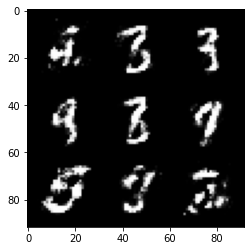

Epoch 171: Generator Loss: 0.003593781101169871; Discriminator Loss: 0.0008566741750184407
Epoch 172: Generator Loss: 0.003553252992853681; Discriminator Loss: 0.000877357113844296
Epoch 173: Generator Loss: 0.003298928234368753; Discriminator Loss: 0.0009617463612098938
Epoch 174: Generator Loss: 0.003752413080699408; Discriminator Loss: 0.0007498494343462784
Epoch 175: Generator Loss: 0.0035723165662558095; Discriminator Loss: 0.00079306394560759


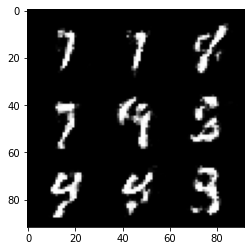

Epoch 176: Generator Loss: 0.0042722814881216995; Discriminator Loss: 0.0007425824970578842
Epoch 177: Generator Loss: 0.0037308120524196992; Discriminator Loss: 0.0007552289759426482
Epoch 178: Generator Loss: 0.003644888334945321; Discriminator Loss: 0.0008128140526793913
Epoch 179: Generator Loss: 0.003693994174379784; Discriminator Loss: 0.0007309093912527251
Epoch 180: Generator Loss: 0.003685225301714086; Discriminator Loss: 0.0009124624068294761


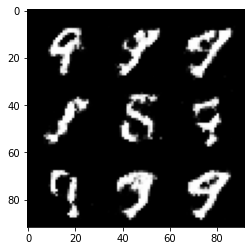

Epoch 181: Generator Loss: 0.003640000754073739; Discriminator Loss: 0.0007885575040317039
Epoch 182: Generator Loss: 0.0034547406218961864; Discriminator Loss: 0.0008386512046683825
Epoch 183: Generator Loss: 0.003205758676345923; Discriminator Loss: 0.0008166356127399371
Epoch 184: Generator Loss: 0.003841333043600705; Discriminator Loss: 0.0007087658209078856
Epoch 185: Generator Loss: 0.003534220937472671; Discriminator Loss: 0.0008128991386275302


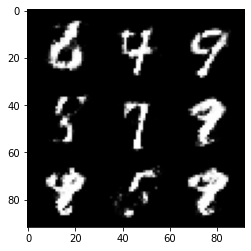

Epoch 186: Generator Loss: 0.0034422505893178584; Discriminator Loss: 0.000717106594968198
Epoch 187: Generator Loss: 0.003381891799633945; Discriminator Loss: 0.0006431027897385392
Epoch 188: Generator Loss: 0.0032231502695632642; Discriminator Loss: 0.0009610455935951998
Epoch 189: Generator Loss: 0.0036613443004551217; Discriminator Loss: 0.0007370351982523383
Epoch 190: Generator Loss: 0.0038335165743634647; Discriminator Loss: 0.0006622586296057142


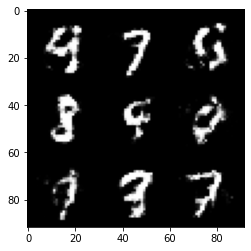

Epoch 191: Generator Loss: 0.003676795501952995; Discriminator Loss: 0.0007005979511529398
Epoch 192: Generator Loss: 0.003611104066438004; Discriminator Loss: 0.0009273984538975046
Epoch 193: Generator Loss: 0.003762938066332071; Discriminator Loss: 0.0007843485137801181
Epoch 194: Generator Loss: 0.0032272887890781167; Discriminator Loss: 0.0007397388852735572
Epoch 195: Generator Loss: 0.0036389243119815265; Discriminator Loss: 0.0007347670445310027


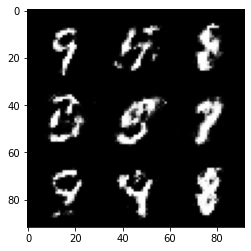

Epoch 196: Generator Loss: 0.0036766376576698157; Discriminator Loss: 0.0007166927303078332
Epoch 197: Generator Loss: 0.003520860600827345; Discriminator Loss: 0.0008478045844828396
Epoch 198: Generator Loss: 0.003929228670815669; Discriminator Loss: 0.0006513422740293719
Epoch 199: Generator Loss: 0.0036829181317327374; Discriminator Loss: 0.0007687387690106942
Epoch 200: Generator Loss: 0.0034121030937634043; Discriminator Loss: 0.0009330321730835351


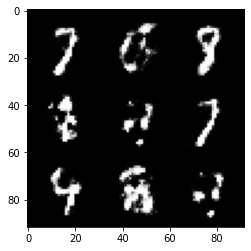

In [11]:
loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    for real, label in trainloader:
        b = real.size(0)
        real = real.view(b, -1).to(device)
        
        d_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        fake_pred = d(fake.detach())
        real_pred = d(real)
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
        real_loss = criterion(real_pred, torch.ones_like(real_pred))
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        g_loss = criterion(pred, torch.ones_like(pred))
        g_loss.backward()
        g_optimizer.step()
    
    epoch_g_loss = g_loss.item() / len(trainloader)
    epoch_d_loss = d_loss.item() / len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%5==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu").view(-1, 1, 28, 28)
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()